In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data_df = pd.read_csv("news_ling_features.csv")

In [3]:
data_df.head()

,text,Polarity,t_syll3,a_char_pw,simp_adj_var,simp_adv_var,simp_intj_var,simp_noun_var,simp_num_var,simp_pron_var,...,a_punct_pw,a_sconj_pw,a_sym_pw,a_verb_pw,a_space_pw,a_intj_ps,a_num_ps,a_pron_ps,a_propn_ps,smog
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0,56,4.22,0.80,0.66,0.0,0.66,0.60,0.17,...,0.08,0.02,0.0,0.11,0.02,0.0,0.06,1.39,1.77,4.58
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,21,4.67,0.97,0.96,0.0,0.90,0.67,0.33,...,0.13,0.02,0.0,0.14,0.02,0.0,0.35,1.62,2.35,5.13
2,Kerry to go to Paris in gesture of sympathyU.S...,1,16,4.67,0.90,0.92,0.0,0.76,0.50,0.41,...,0.09,0.03,0.0,0.12,0.02,0.0,0.12,1.71,4.59,5.54
3,Bernie supporters on Twitter erupt in anger ag...,0,27,5.09,0.84,1.00,0.0,0.77,0.48,0.67,...,0.18,0.01,0.0,0.10,0.03,0.0,1.21,0.95,4.58,6.81
4,The Battle of New York: Why This Primary Matte...,1,11,4.31,0.85,0.92,0.0,0.65,1.00,0.43,...,0.15,0.02,0.0,0.12,0.03,0.0,0.38,1.00,2.76,4.13


In [4]:
# getting the feature info dictionaries for reference

import lftk

features = lftk.search_features(return_format="list_dict")

no permutation as feature selection since with colinear features, the info will be obtainable with a different feature

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import rfecv
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

workflow: 
- initialize standard basic default models
- determine PCA hyperparams - 33 components
- make 2 pipelines: 
        pipe 1: scale, pca, train test
        pipe 2: scale feature selection, trian test
- compare the perf of the models
- select 1
- hyper param tuning

In [6]:
scaler = StandardScaler()

X = data_df.drop(["text", "Polarity"], axis=1)
X_stand = scaler.fit_transform(X)

y = data_df["Polarity"]

## PCA

In [7]:
pca = PCA(random_state=42)
scaler = StandardScaler()

pca_fit = pca.fit(X_stand)
cum_explained_ratio = np.cumsum(pca_fit.explained_variance_ratio_)

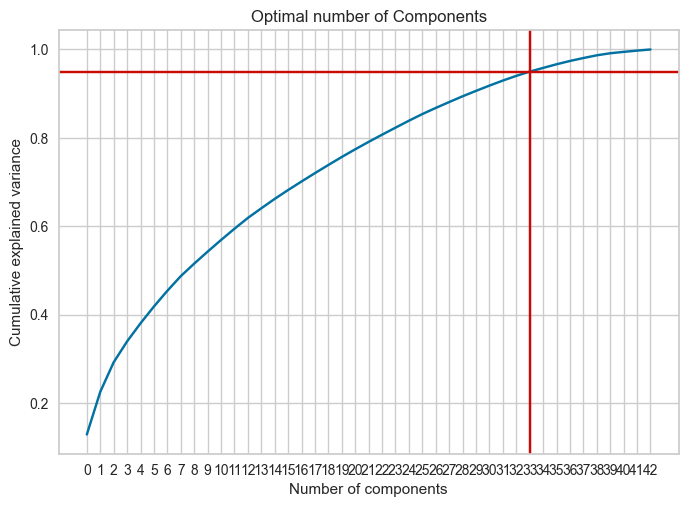

In [8]:
plt.plot(cum_explained_ratio)

plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.axvline(x = 33, color = 'r', linestyle = '-')
plt.xticks(ticks=np.arange(0, len(cum_explained_ratio), step=1))

plt.title("Optimal number of Components")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Recursive Feature Elimination

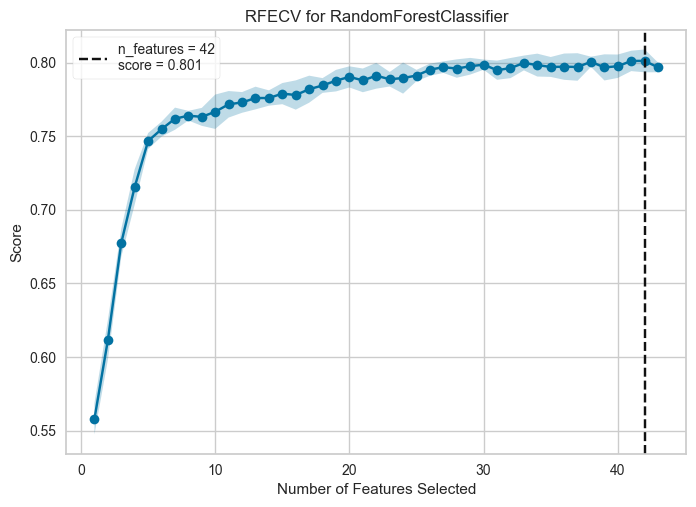

In [13]:
rfecv = rfecv(RandomForestClassifier(random_state=42), X_stand, y, scoring="f1_weighted")

*workflow from here onwards works with rfecv from sklearn, check that yellowbrick is the same in terms of attributes

In [9]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=7)

In [10]:
rfe.fit(X_stand, y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

In [11]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [12]:
features_train = list(X.columns)
selection_mask = list(rfe.support_)

In [13]:
features_train

['t_syll3',
 'a_char_pw',
 'simp_adj_var',
 'simp_adv_var',
 'simp_intj_var',
 'simp_noun_var',
 'simp_num_var',
 'simp_pron_var',
 'simp_propn_var',
 'simp_sconj_var',
 'simp_sym_var',
 'simp_verb_var',
 'simp_space_var',
 'root_aux_var',
 'root_part_var',
 'root_propn_var',
 'root_space_var',
 'corr_adp_var',
 'corr_cconj_var',
 'corr_det_var',
 'corr_pron_var',
 'corr_punct_var',
 'corr_sconj_var',
 'uber_ttr_no_lem',
 'a_adj_pw',
 'a_adp_pw',
 'a_adv_pw',
 'a_aux_pw',
 'a_cconj_pw',
 'a_det_pw',
 'a_intj_pw',
 'a_noun_pw',
 'a_part_pw',
 'a_punct_pw',
 'a_sconj_pw',
 'a_sym_pw',
 'a_verb_pw',
 'a_space_pw',
 'a_intj_ps',
 'a_num_ps',
 'a_pron_ps',
 'a_propn_ps',
 'smog']

In [14]:
len(features_train)

43

In [15]:
selection_mask.count(False)

36

In [16]:
from itertools import compress

selected_features = list(compress(features_train, selection_mask))

In [17]:
selected_features

['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

In [18]:
# features

In [19]:
name_selected_features = [feature["name"] for feature in features if feature["key"] in selected_features]
name_selected_features

['total_number_of_words_more_than_three_syllables',
 'root_proper_nouns_variation',
 'root_spaces_variation',
 'corrected_punctuations_variation',
 'uber_type_token_ratio_no_lemma',
 'average_number_of_proper_nouns_per_sentence',
 'smog_index']

## Models

In [20]:
def score_models(X, y, model, selected_features=selected_features, pca=PCA(n_components=33), cv=StratifiedKFold(n_splits=5)):
    
    X_features = X[selected_features]
    X_pca = pca.fit_transform(X)
    
    scores_rfe = cross_validate(model, X_features, y, scoring = ["f1_weighted", "accuracy", "precision", "recall"], cv=cv)
    scores_pca = cross_validate(model, X_pca, y, scoring = ["f1_weighted", "accuracy", "precision", "recall"], cv=cv)
    
    processed_scores_rfe = {f"mean_{key}": np.mean(value) for key, value in scores_rfe.items()}
    processed_scores_pca = {f"mean_{key}": np.mean(value) for key, value in scores_pca.items()}
    
    processed_scores_rfe["model_name"] = str(model)[:-2]
    processed_scores_pca["model_name"] = str(model)[:-2]
    
    processed_scores_rfe["method"] = "rfe"
    processed_scores_pca["method"] = "pca"
    
    return processed_scores_rfe, processed_scores_pca

In [21]:
models = [RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42)]
scores = []

for model in models:
    processed_scores_rfe, processed_scores_pca = score_models(X, y, model)
    scores.append(processed_scores_rfe)
    scores.append(processed_scores_pca)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

In [22]:
scores

[{'mean_fit_time': 0.7524344444274902,
  'mean_score_time': 0.024048233032226564,
  'mean_test_f1_weighted': 0.7619450951693347,
  'mean_test_accuracy': 0.7619573796369377,
  'mean_test_precision': 0.760103320556673,
  'mean_test_recall': 0.7663146128815918,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 2.3807211399078367,
  'mean_score_time': 0.02126479148864746,
  'mean_test_f1_weighted': 0.7730790144370017,
  'mean_test_accuracy': 0.7731649565903709,
  'mean_test_precision': 0.7833267779999182,
  'mean_test_recall': 0.7562323952408156,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'pca'},
 {'mean_fit_time': 0.6824907779693603,
  'mean_score_time': 0.007560539245605469,
  'mean_test_f1_weighted': 0.751868661310545,
  'mean_test_accuracy': 0.7521704814522494,
  'mean_test_precision': 0.737075418989049,
  'mean_test_recall': 0.7852385801932488,
  'model_name': 'GradientBoostingClassifier(random_state=4',
  'method

## Results

In [23]:
results_df = pd.DataFrame(scores)

In [24]:
results_df

,mean_fit_time,mean_score_time,mean_test_f1_weighted,mean_test_accuracy,mean_test_precision,mean_test_recall,model_name,method
0,0.752434,0.024048,0.761945,0.761957,0.760103,0.766315,RandomForestClassifier(random_state=4,rfe
1,2.380721,0.021265,0.773079,0.773165,0.783327,0.756232,RandomForestClassifier(random_state=4,pca
2,0.682491,0.007561,0.751869,0.752170,0.737075,0.785239,GradientBoostingClassifier(random_state=4,rfe
3,5.302377,0.007192,0.760380,0.760537,0.749782,0.783031,GradientBoostingClassifier(random_state=4,pca
4,0.212457,0.013443,0.726605,0.727072,0.710969,0.766634,AdaBoostClassifier(random_state=4,rfe
5,1.157439,0.013738,0.736387,0.736701,0.724712,0.765051,AdaBoostClassifier(random_state=4,pca


go ahead with random forest and the rfe 7 features

## GRIDSEARCH

In [25]:
param_grid = { 
    'n_estimators': [50, 100, 200, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [2, 4, 8, None],
    "min_samples_split": [2, 5, 10, None],
    'max_leaf_nodes': [3, 6, 9]
    }

In [26]:
from itertools import product
hyperparams, values = zip(*param_grid.items())
number_combinations = [dict(zip(hyperparams, v)) for v in product(*values)]

print(len(number_combinations))
print(number_combinations)

576
[{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 3}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 6}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 9}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 3}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 6}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 9}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 3}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 6}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 9}, {'n_estimators': 50, 'max_fea

In [27]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,  scoring="f1_weighted", refit=True, cv=StratifiedKFold(n_splits=5))

In [28]:
gridsearch.fit(X_stand, y)

## FINAL MODEL

check out https://scikit-learn.org/stable/common_pitfalls.html

nota: antes de hacer todo lo de pca y rfe tengo que splittear en test/train para evitar data leakage

se splitea en train/test ANTES DE LA PIPELINE

LA PIPELINE COGE SOLO TRAIN PARA SPLITTEAR

HAVE A LOOK AT THE RANDOM STATE THING

In [ ]:
# after splitting the train/test, save the scaler or just do a pipeline
# can access this way: 
# # For example, get the first step of the pipeline steps[0]
# then get the actual scaler object [1]
# clf.steps[0][1].scale_

## PIPELINE

in: pieza de texto
1. lftk para conseguir los features de rfe - funcion para crear X
2. standard -  can save the scaler or manually set the mean/std
3. predict - load model and .predict

poner los imports dentro de la funcion o fuera? fuera i think right

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# make a json dict to translate features to the names and save the feature list form the keys of said dictionary

feature_names = ['total_number_of_words_more_than_three_syllables', 'root_proper_nouns_variation', 'root_spaces_variation', 'corrected_punctuations_variation', 'uber_type_token_ratio_no_lemma', 'average_number_of_proper_nouns_per_sentence', 'smog_index']



In [ ]:
def extract_linguistic_features(text):
    
    doc = nlp(text)
    
    features = ['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var', 'uber_ttr_no_lem', 'a_propn_ps', 'smog']
    LFTK = lftk.Extractor(docs = doc)
    LFTK.customize(stop_words = True, round_decimal = 2)
    doc_features = LFTK.extract(features=features)
    
    X = pd.DataFrame(doc_features)
    
    return X

In [ ]:
# probar con cargar la pipeline y pasar directamente la X generada por extract linguistic features

def predict_text(text, scaler, model):
    
    X = extract_linguistic_features(text)
    X_scaled = scaler.transform(text)
    prediction = model.predict(X_scaled)
    
    return prediction